# Лабораторна робота No6
### Застосування numpy

#### Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.
**Постановка задачі:**
Ознайомтесь з теоретичним матеріалом. Створіть програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

Імпортуємо модулі

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

In [3]:
define_line_k = 2  
define_line_b = 1  
data_points = 100

x = np.linspace(-10, 10, data_points)
y = define_line_k * x + define_line_b + np.random.normal(0, 2, data_points)

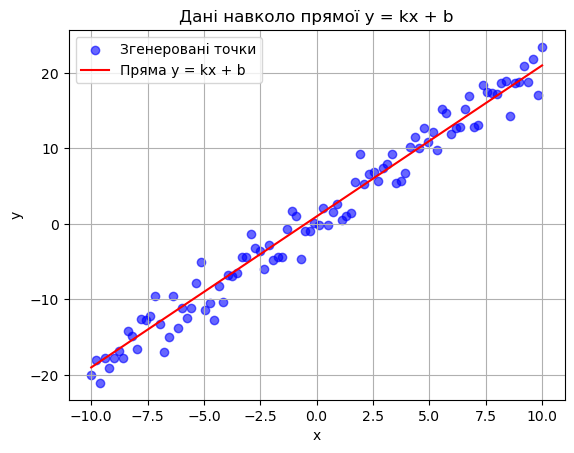

In [4]:
plt.scatter(x, y, label="Згенеровані точки", color="blue", alpha=0.6)
plt.plot(x, define_line_k * x + define_line_b, label="Пряма y = kx + b", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Дані навколо прямої y = kx + b")
plt.legend()
plt.grid()
plt.show()

In [5]:
print("Згенеровані дані (x, y):")
for xi, yi in zip(x, y):
    print(f"({xi:.2f}, {yi:.2f})")

Згенеровані дані (x, y):
(-10.00, -20.03)
(-9.80, -17.99)
(-9.60, -21.05)
(-9.39, -17.76)
(-9.19, -19.12)
(-8.99, -17.81)
(-8.79, -16.84)
(-8.59, -17.79)
(-8.38, -14.13)
(-8.18, -14.80)
(-7.98, -16.57)
(-7.78, -12.64)
(-7.58, -12.74)
(-7.37, -12.14)
(-7.17, -9.54)
(-6.97, -13.29)
(-6.77, -16.93)
(-6.57, -14.98)
(-6.36, -9.48)
(-6.16, -13.84)
(-5.96, -11.09)
(-5.76, -12.39)
(-5.56, -11.09)
(-5.35, -7.78)
(-5.15, -4.99)
(-4.95, -11.45)
(-4.75, -10.48)
(-4.55, -12.69)
(-4.34, -8.20)
(-4.14, -10.28)
(-3.94, -6.70)
(-3.74, -6.87)
(-3.54, -6.47)
(-3.33, -4.37)
(-3.13, -4.40)
(-2.93, -1.28)
(-2.73, -3.17)
(-2.53, -3.56)
(-2.32, -5.94)
(-2.12, -2.76)
(-1.92, -4.77)
(-1.72, -4.39)
(-1.52, -4.35)
(-1.31, -0.73)
(-1.11, 1.77)
(-0.91, 1.08)
(-0.71, -4.58)
(-0.51, -0.94)
(-0.30, -0.90)
(-0.10, 0.13)
(0.10, -0.13)
(0.30, 2.13)
(0.51, -0.15)
(0.71, 1.56)
(0.91, 2.70)
(1.11, 0.53)
(1.31, 1.06)
(1.52, 1.44)
(1.72, 5.53)
(1.92, 9.31)
(2.12, 5.33)
(2.32, 6.57)
(2.53, 6.87)
(2.73, 5.75)
(2.93, 7.36)
(3.13

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [6]:
def least_squares_fit(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    k_opt = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b_opt = y_mean - k_opt * x_mean
    return k_opt, b_opt


k_opt, b_opt = least_squares_fit(x, y)

In [7]:
print(f"k_opt = {k_opt:.2f}, b_opt = {b_opt:.2f}")

k_opt = 2.04, b_opt = 0.83


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [15]:
polyfit_k, polyfit_b = np.polyfit(x, y, 1)
print(f"polyfit_k = {polyfit_k:.2f}, polyfit_b = {polyfit_b:.2f}")

polyfit_k = 2.04, polyfit_b = 0.83


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

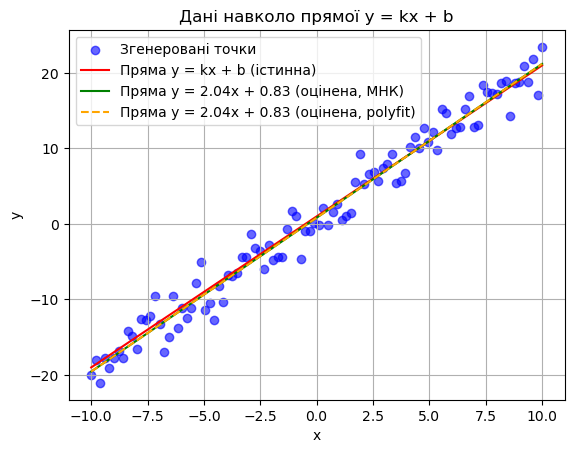

In [ ]:
plt.scatter(x, y, label="Згенеровані точки", color="blue", alpha=0.6)
plt.plot(x, define_line_k * x + define_line_b, label="Пряма y = kx + b (істинна)", color="red")
plt.plot(x, k_opt * x + b_opt, label=f"Пряма y = {k_opt:.2f}x + {b_opt:.2f} (оцінена, МНК)", color="green")
plt.plot(x, polyfit_k * x + polyfit_b, label=f"Пряма y = {polyfit_k:.2f}x + {polyfit_b:.2f} (оцінена, polyfit)", color="orange", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Дані навколо прямої y = kx + b")
plt.legend()
plt.grid()
plt.show()

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [11]:
def gradient_descent_fit(x, y, learning_rate=0.01, n_iter=1000):
    k = 0.0  
    b = 0.0  
    n = len(x)
    for _ in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred
        k_grad = -2 / n * np.sum(x * error)
        b_grad = -2 / n * np.sum(error)
        k -= learning_rate * k_grad
        b -= learning_rate * b_grad
    return k, b

In [14]:
gd_k, gd_b = gradient_descent_fit(x, y, learning_rate=0.01, n_iter=1000)
print(f"gd_k = {gd_k:.2f}, gd_b = {gd_b:.2f}")

gd_k = 2.04, gd_b = 0.83


Додайте отриману лінію регресії на загальний графік

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

Порівняйте отримані результати з результатами попереднього завдання

In [16]:
def gradient_descent_fit2(x, y, learning_rate=0.01, n_iter=1000):
    k = 0.0  
    b = 0.0  
    n = len(x)
    error_history = []  
    for _ in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred
        mse = np.mean(error**2)  
        error_history.append(mse)
        k_grad = -2 / n * np.sum(x * error)
        b_grad = -2 / n * np.sum(error)
        k -= learning_rate * k_grad
        b -= learning_rate * b_grad
    return k, b, error_history


In [17]:
gd_k2, gd_b2, error_history = gradient_descent_fit2(x, y, learning_rate=0.01, n_iter=1000)
print(f"gd_k = {gd_k2:.2f}, gd_b = {gd_b2:.2f}, error = {error_history}")

gd_k = 2.04, gd_b = 0.83, error = [145.7293660358289, 18.95261772866957, 5.958473116366795, 4.606777643630348, 4.447145358294254, 4.410322486848723, 4.386876131191064, 4.365577661129816, 4.3452473729727465, 4.325734929153975, 4.306996484138934, 4.289000215171259, 4.271716612126366, 4.255117441160848, 4.239175597508683, 4.2238650508797875, 4.209160801898892, 4.195038841177796, 4.181476110101268, 4.168450463175374, 4.155940631867743, 4.143926189879897, 4.132387519794769, 4.121305781045012, 4.1106628791497455, 4.100441436169532, 4.090624762331333, 4.081196828777128, 4.072142241391671, 4.063446215666676, 4.055094552560392, 4.047073615313116, 4.039370307180831, 4.0319720500505865, 4.024866763902699, 4.018042847086269, 4.0114891573757685, 4.005194993777803, 3.9991500790583183, 3.993344542961724, 3.987768906094556, 3.9824140644473265, 3.9772712745293295, 3.9723321390920843, 3.9675885934181525, 3.96303289215291, 3.95865759665777, 3.954455562864238, 3.9504199296089304, 3.9465441074305323, 3.942

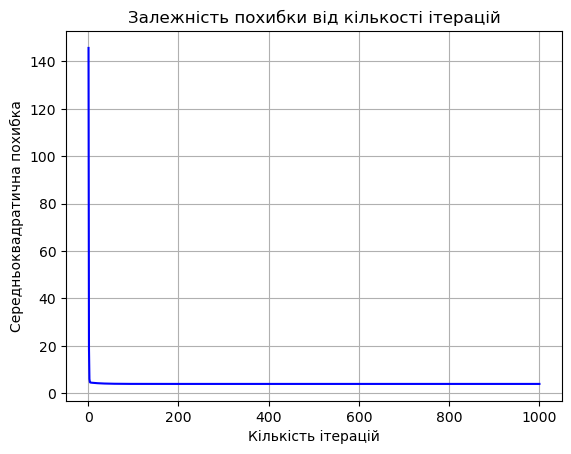

In [18]:
plt.plot(range(1, len(error_history) + 1), error_history, color="blue")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Середньоквадратична похибка")
plt.title("Залежність похибки від кількості ітерацій")
plt.grid()
plt.show()